# Linear Model in Price Prediction 

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline


## 1. Exploratory Data Anaysis 


In [58]:
df=pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [59]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [60]:
## To check the number of missing data
df.isnull().sum()  ### before

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [61]:
## Since we have more than 40000, it's okay 
## to drop one quarter of data due to missing data
df = df.dropna()
df.isnull().sum()  ### after

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [62]:
## From here, we notice that there will 
## be 10 numerical factors and 6 categorical factors 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
id                                38821 non-null int64
name                              38821 non-null object
host_id                           38821 non-null int64
host_name                         38821 non-null object
neighbourhood_group               38821 non-null object
neighbourhood                     38821 non-null object
latitude                          38821 non-null float64
longitude                         38821 non-null float64
room_type                         38821 non-null object
price                             38821 non-null int64
minimum_nights                    38821 non-null int64
number_of_reviews                 38821 non-null int64
last_review                       38821 non-null object
reviews_per_month                 38821 non-null float64
calculated_host_listings_count    38821 non-null int64
availability_365                  38821 non-null int64

In [63]:
## Find the price quantile 
df.price.quantile([0.2, 0.40, 0.60, 0.8])

0.2     60.0
0.4     90.0
0.6    125.0
0.8    190.0
Name: price, dtype: float64

Text(0.5, 0, 'Price')

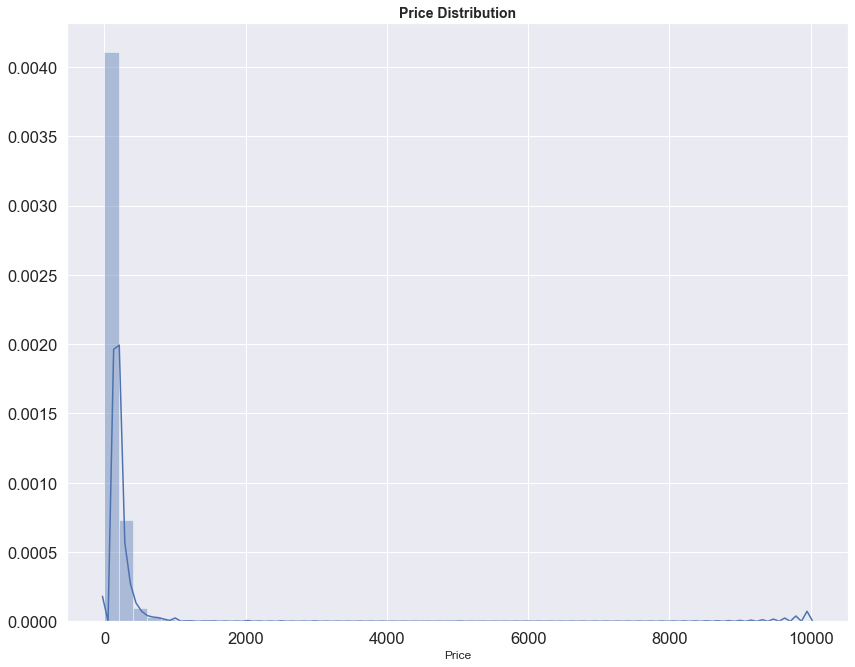

In [64]:
# Find the price distribution 
plt.figure(figsize=(14,11))
sns.distplot(df.price)
plt.title("Price Distribution",size=14, weight='bold')
plt.xlabel("Price", size=12)

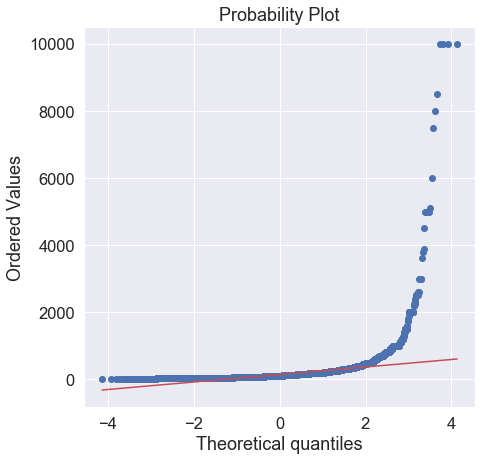

In [65]:
# Using Probability Plot to check normality assumption
from scipy import stats
plt.figure(figsize=(7,7))
stats.probplot(df['price'], plot=plt)
plt.show()

In [66]:
# Convert according to low, medium, high and very high category

def priceLevel(price):
    if(price<60):
        return 0,"low"
    elif(price>=60 and price<90):
        return 1,"medium"
    elif(price>=90 and price<125):
        return 2,"high"
    else:
        return 3,"very high"
degrees=[]
labels=[]

for index,row in df.iterrows():
    degree,label=priceLevel(row["price"])
    degrees.append(degree)
    labels.append(label)

df.insert(11,"price_degree",degrees)
df.insert(12,"price_label",labels)
df['price_log'] = np.log(df.price+1)

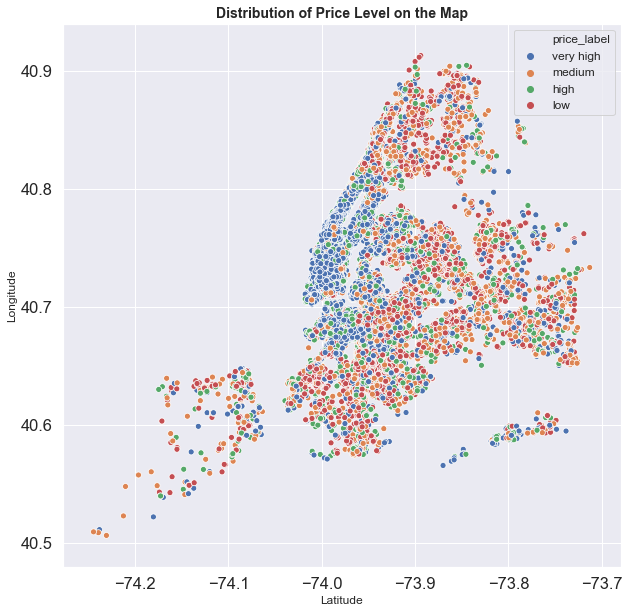

In [67]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price_label', palette='deep')
plt.title('Distribution of Price Level on the Map', size=14, weight = 'bold')
plt.xlabel('Latitude', size = 12)
plt.ylabel("Longitude", size = 12)
plt.legend(frameon=True, fontsize=12)

Text(0.5, 1.0, 'Room Type vs Price')

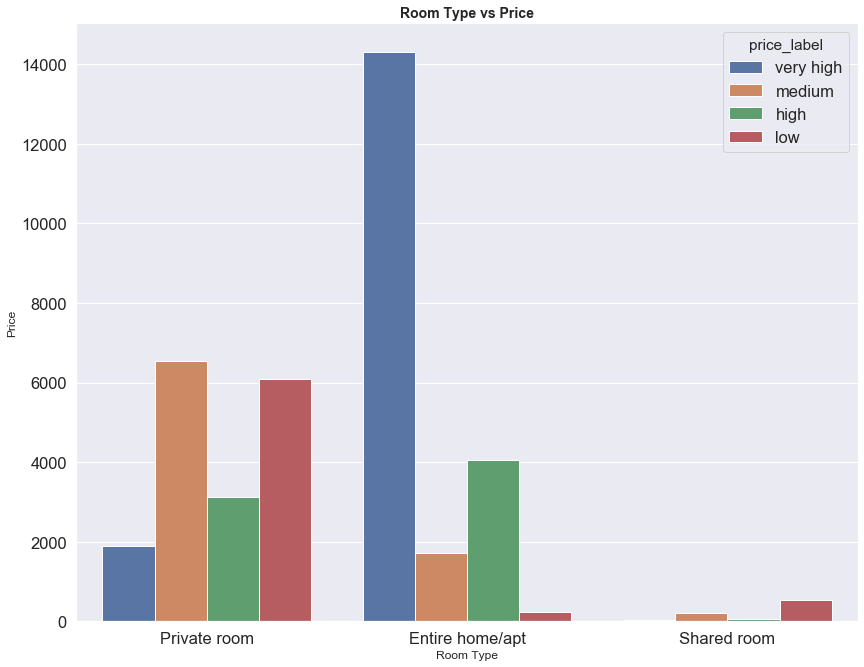

In [68]:
## Data fulfills the instinct that the room type correlates with price reasonably 
plt.figure(figsize=(14,11))
sns.countplot(x='room_type', hue='price_label', data=df)

plt.xlabel("Room Type", size=12)
plt.ylabel("Price", size=12)
plt.title("Room Type vs Price",size=14, weight='bold')

Text(0.5, 1.0, 'Neighbourhood Area vs Price')

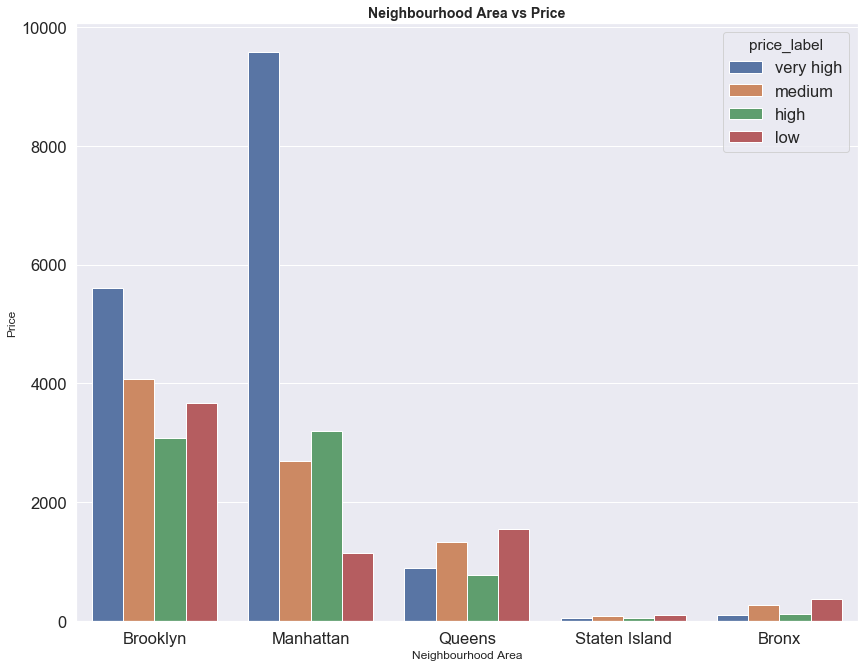

In [69]:
## Find out how neighbourhood area correlates with price
plt.figure(figsize=(14,11))
sns.countplot(x='neighbourhood_group', hue='price_label', data=df)

plt.xlabel("Neighbourhood Area", size=12)
plt.ylabel("Price", size=12)
plt.title("Neighbourhood Area vs Price",size=14, weight='bold')

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

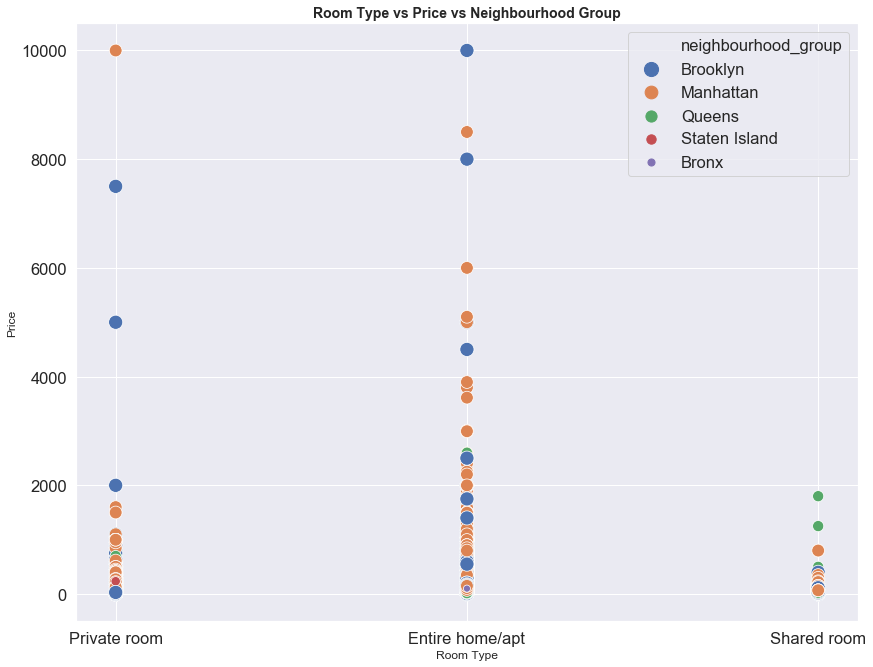

In [70]:
# Find out the underlying relationship between neighbourhood group, room type and price
plt.figure(figsize=(14,11))
sns.scatterplot(x="room_type", y="price", hue="neighbourhood_group", size="neighbourhood_group",
                sizes=(50, 200), palette= "deep", data=df)

plt.xlabel("Room Type", size=12)
plt.ylabel("Price", size=12)
plt.title("Room Type vs Price vs Neighbourhood Group",size=14, weight='bold')

Text(0.5, 1.0, 'Number of Reviews vs Price')

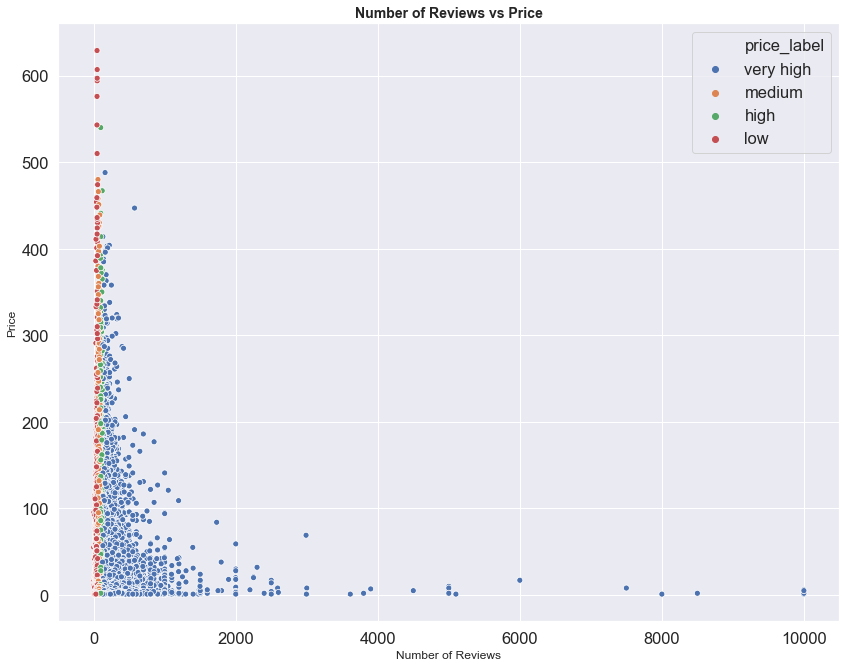

In [71]:
# Find out the underlying relationship between number of reviews and price
plt.figure(figsize=(14,11))
sns.scatterplot(x="price", y = "number_of_reviews", hue="price_label", sizes=(50, 200), palette= "deep", data=df)

plt.xlabel("Number of Reviews", size=12)
plt.ylabel("Price", size=12)
plt.title("Number of Reviews vs Price",size=14, weight='bold')

In [72]:
# Encoding room type, neighbourhood_group to numerical as it may be useful to measure correlation coefficient 

df['neighbourhood_group']= df['neighbourhood_group'].astype("category").cat.codes
df['room_type'] = df['room_type'].astype("category").cat.codes
df['price_label'] = df['price_label'].astype("category").cat.codes
df.info()

# Drop ID, name, host_id, host_name
df = df.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'last_review', 'latitude', 'longitude'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 19 columns):
id                                38821 non-null int64
name                              38821 non-null object
host_id                           38821 non-null int64
host_name                         38821 non-null object
neighbourhood_group               38821 non-null int8
neighbourhood                     38821 non-null object
latitude                          38821 non-null float64
longitude                         38821 non-null float64
room_type                         38821 non-null int8
price                             38821 non-null int64
minimum_nights                    38821 non-null int64
price_degree                      38821 non-null int64
price_label                       38821 non-null int8
number_of_reviews                 38821 non-null int64
last_review                       38821 non-null object
reviews_per_month                 38821 non-null float64
calc

In [97]:
df.info()
df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 10 columns):
neighbourhood_group               38821 non-null int8
room_type                         38821 non-null int8
minimum_nights                    38821 non-null int64
price_degree                      38821 non-null int64
price_label                       38821 non-null int8
number_of_reviews                 38821 non-null int64
reviews_per_month                 38821 non-null float64
calculated_host_listings_count    38821 non-null int64
availability_365                  38821 non-null int64
price_log                         38821 non-null float64
dtypes: float64(2), int64(5), int8(3)
memory usage: 3.7 MB


,neighbourhood_group,room_type,minimum_nights,price_degree,price_label,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,1,1,1,3,3,9,0.21,6,365,5.010635
1,2,0,1,3,3,45,0.38,2,355,5.420535
3,1,0,1,1,2,270,4.64,1,194,4.499810
4,2,0,10,1,2,9,0.10,1,0,4.394449
5,2,0,3,3,3,74,0.59,1,129,5.303305
6,1,1,45,1,2,49,0.40,1,0,4.110874
7,2,1,2,1,2,430,3.47,1,220,4.382027
8,2,1,2,1,2,118,0.99,1,0,4.382027
9,2,0,1,3,3,160,1.33,4,188,5.017280
10,2,0,5,3,3,53,0.43,1,6,4.912655


C:\Users\Lai Wai Tuck\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Lai Wai Tuck\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Lai Wai Tuck\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


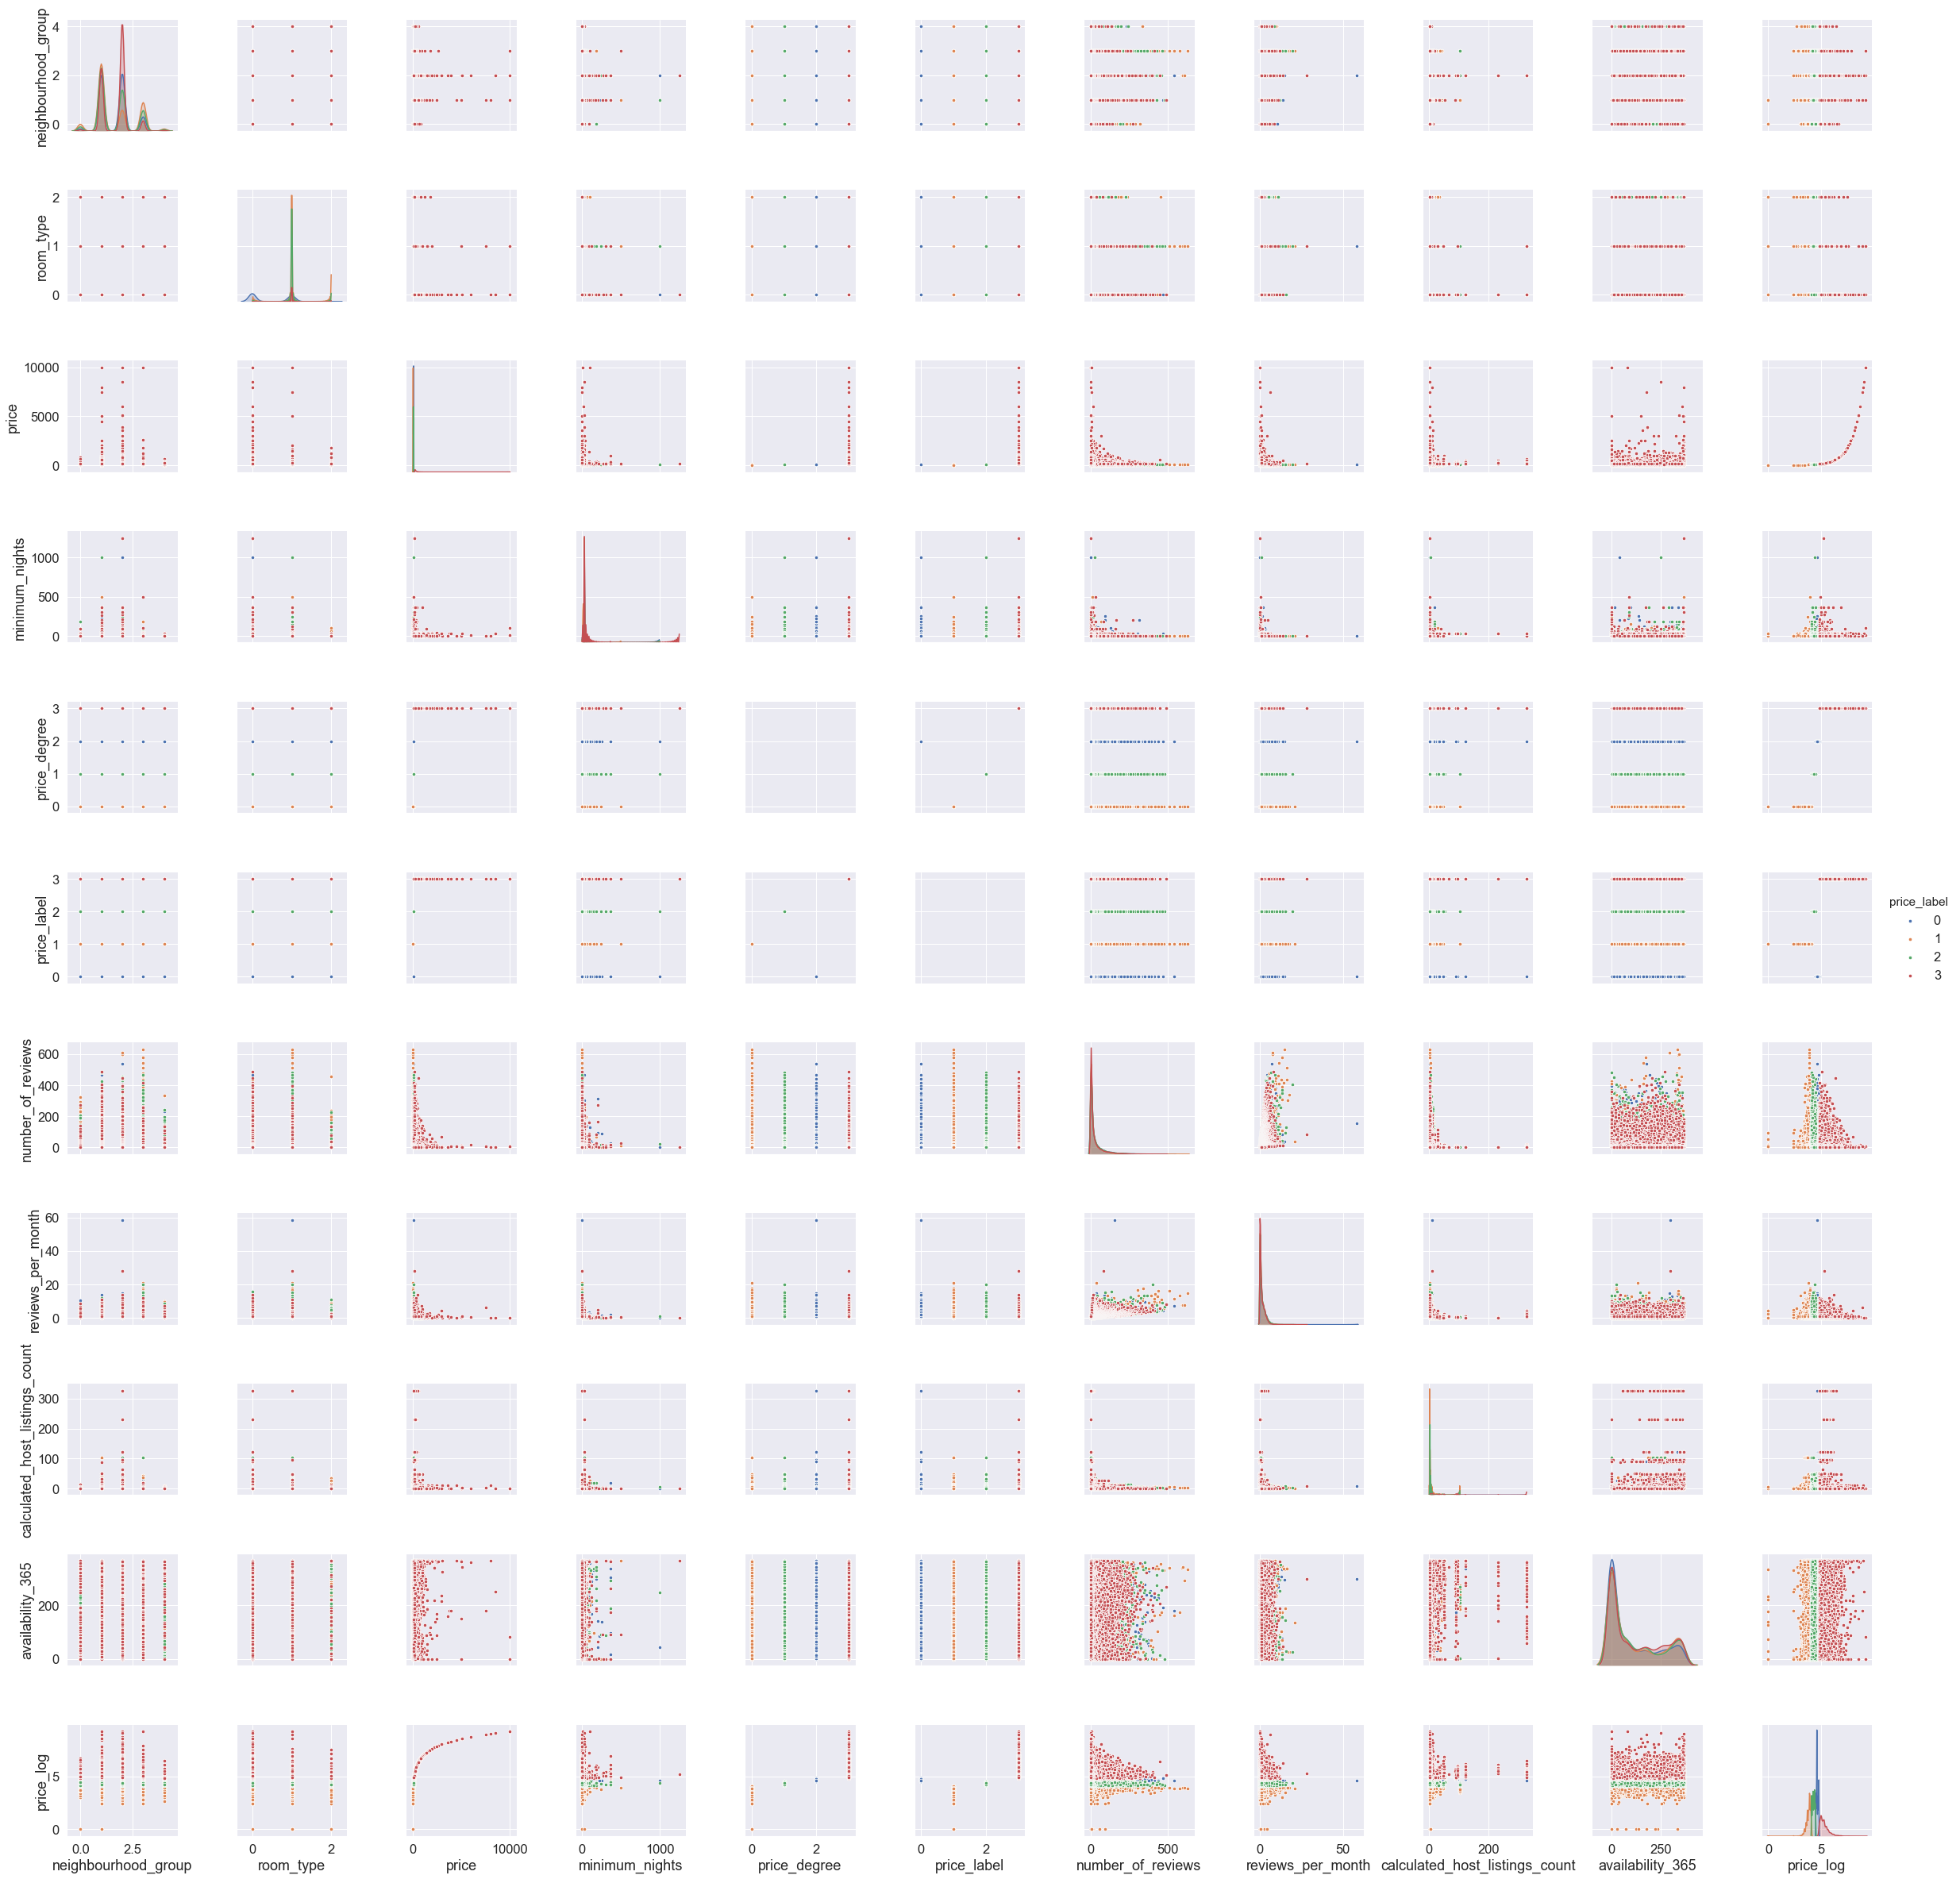

In [74]:
sns.pairplot(df, hue="price_label", palette='deep',
             size=3, diag_kind='kde', diag_kws=dict(shade=True), plot_kws=dict(s=20))

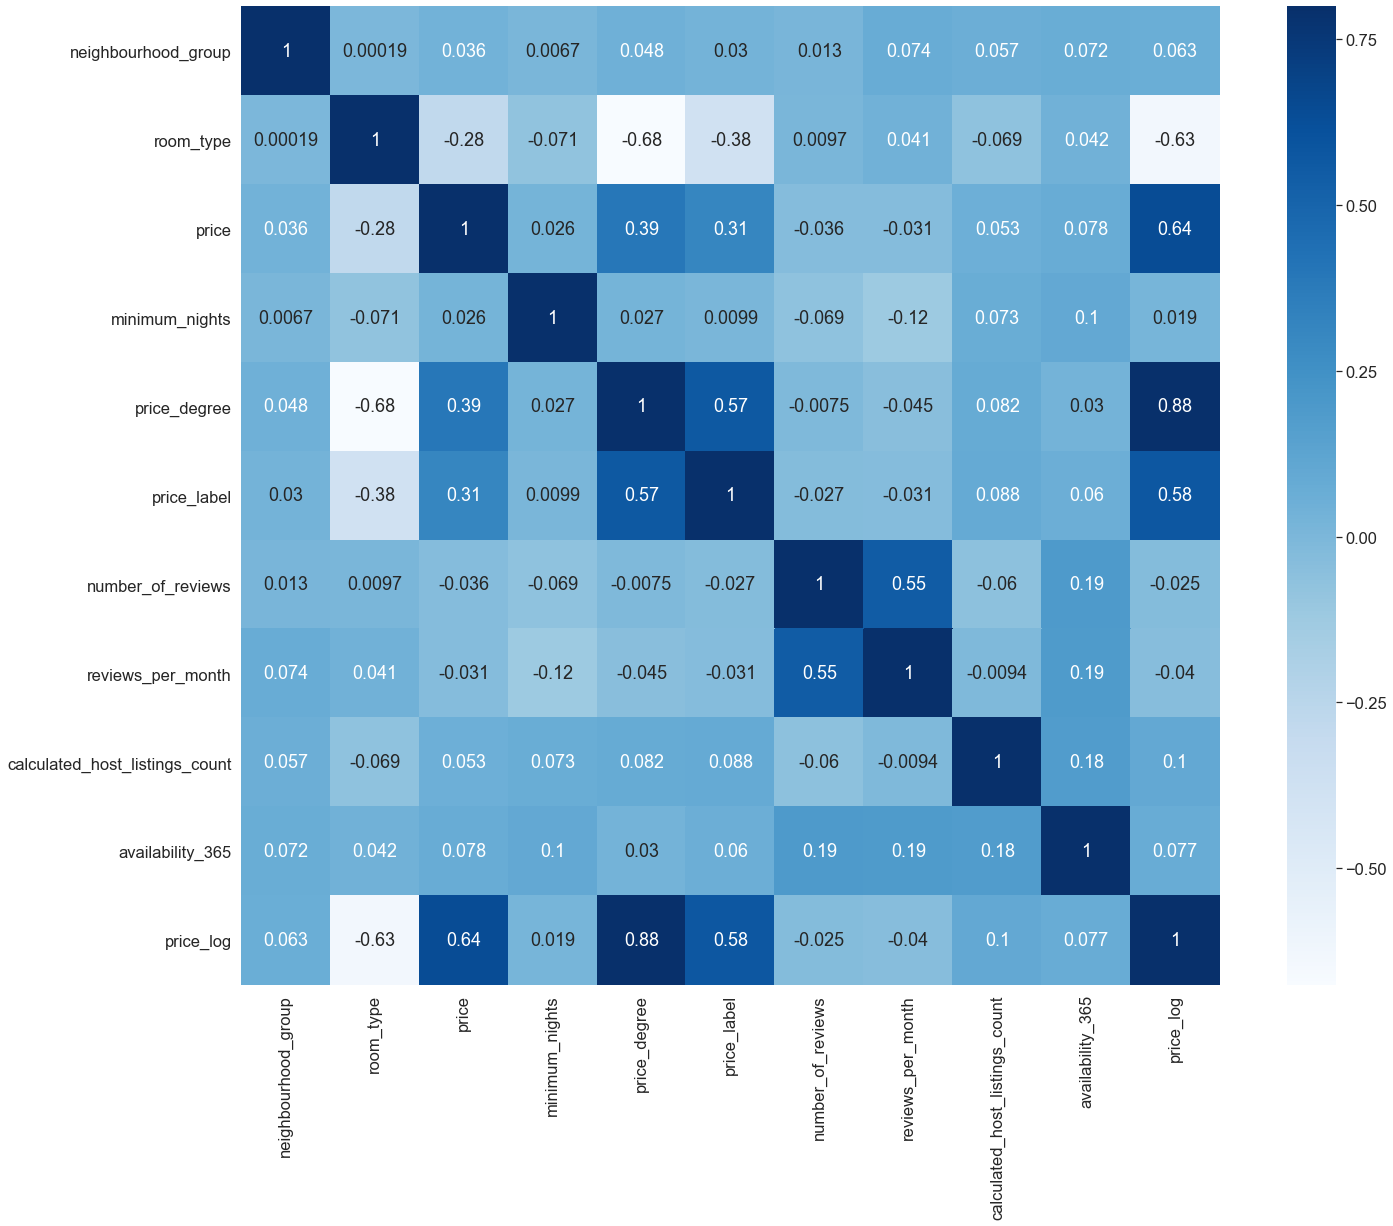

In [75]:
# Use this to explore correlation coefficient between variables
hmap = df.corr(method = "pearson")
plt.subplots(figsize=(24, 18))
sns.set(font_scale=1.5)
sns.heatmap(hmap, vmax=0.8, annot=True, cmap='Blues', square=True)

In [76]:
# Drop price
df = df.drop(columns = ['price'])

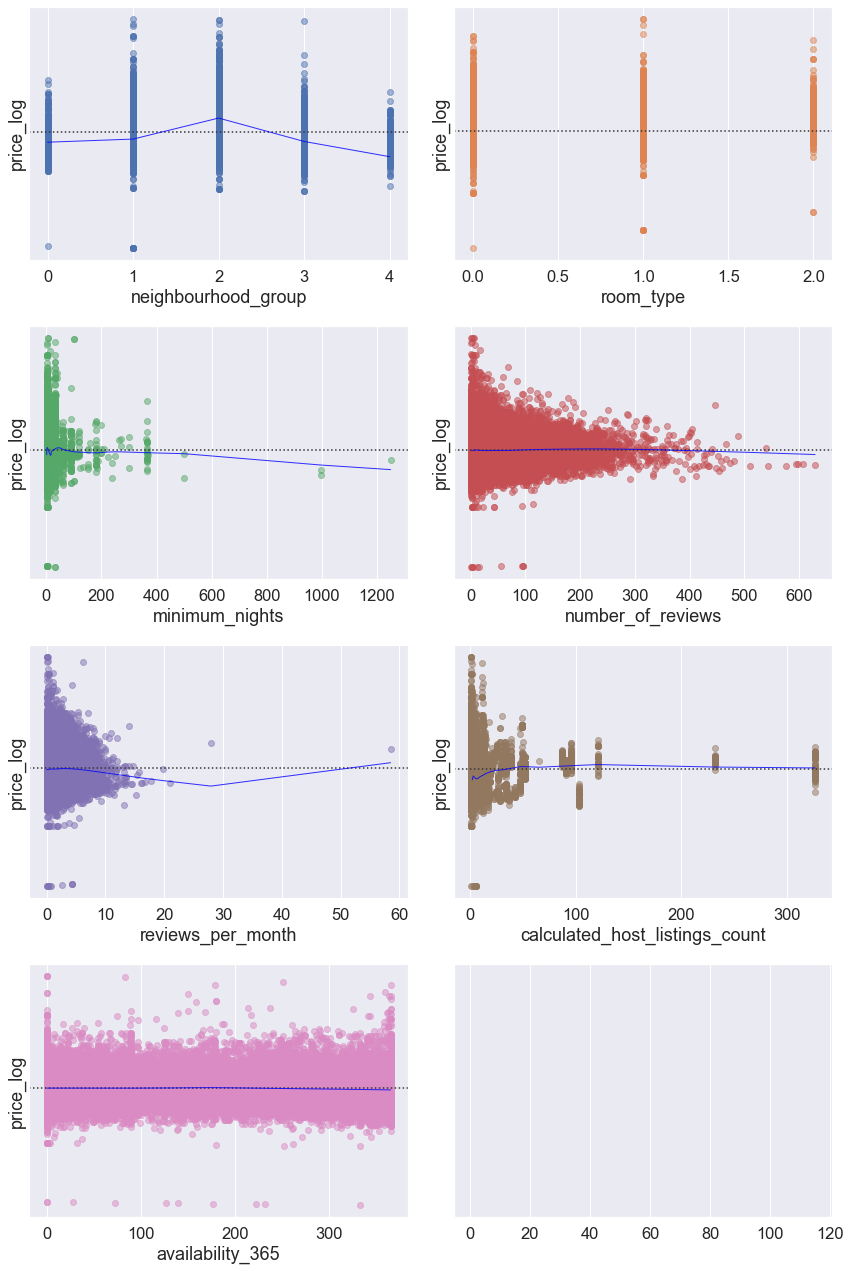

In [79]:
# Residual Plot 

AirBnB_x, AirBnB_y = df.iloc[:,:-1], df.iloc[:,-1]

f, axes = plt.subplots(4, 2, figsize=(12, 18))
sns.residplot(AirBnB_x.iloc[:,0],AirBnB_y, lowess=True, ax=axes[0, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
sns.residplot(AirBnB_x.iloc[:,1],AirBnB_y, lowess=True, ax=axes[0, 1],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
sns.residplot(AirBnB_x.iloc[:,2],AirBnB_y, lowess=True, ax=axes[1, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
sns.residplot(AirBnB_x.iloc[:,5],AirBnB_y, lowess=True, ax=axes[1, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
sns.residplot(AirBnB_x.iloc[:,6],AirBnB_y, lowess=True, ax=axes[2, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
sns.residplot(AirBnB_x.iloc[:,7],AirBnB_y, lowess=True, ax=axes[2, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
sns.residplot(AirBnB_x.iloc[:,8],AirBnB_y, lowess=True, ax=axes[3, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})

plt.setp(axes, yticks=[])
plt.tight_layout()

## 2. Training Model 

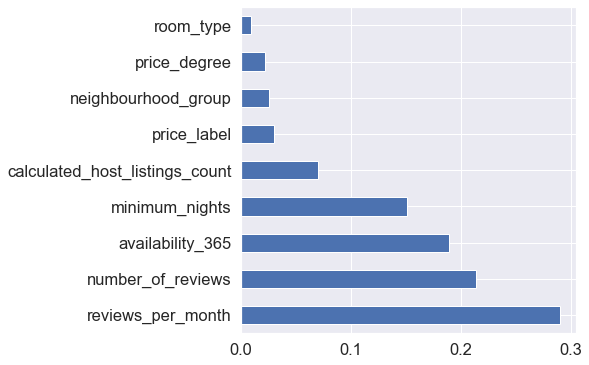

In [117]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


# To normalize the data 
scaler = StandardScaler()
AirBnB_x = scaler.fit_transform(AirBnB_x)

# To split the train and test data into 80-20 ratio

X_train, X_test, Y_train, Y_test = train_test_split(AirBnB_x, AirBnB_y, test_size=0.3,random_state=20)

lab_enc = preprocessing.LabelEncoder()

# To show the importance of each feature 
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, lab_enc.fit_transform(Y_train))
plt.figure(figsize=(6,6))
clf_importances = pd.Series(clf.feature_importances_, index=df.iloc[:,:-1].columns)
clf_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [109]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

# Perform K-fold cross validation to make sure that the model will not be overfitting
kfold_cv=KFold(n_splits=5, random_state=42, shuffle=False)

for train_index, test_index in kfold_cv.split(AirBnB_x, AirBnB_y):
    
    x_train, x_test = AirBnB_x[train_index], AirBnB_x[test_index]
    y_train, y_test = AirBnB_y[train_index], AirBnB_y[test_index]


C:\Users\Lai Wai Tuck\Anaconda3\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [118]:
# Transform the x data into polynomial due to non-linearity is observed

Poly = PolynomialFeatures(degree=2, interaction_only = True)
X_train = Poly.fit_transform(X_train)
X_test = Poly.fit_transform(X_test)

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


linear_model = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
linear_model.fit(X_train, Y_train)
Y_pred_lm = linear_model.predict(X_test)

In [122]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.01, normalize = True)
ridge.fit(X_train, Y_train)           
Y_pred_ridge = ridge.predict(X_test) 

In [123]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001, normalize =False)
lasso.fit(X_train, Y_train)
Y_pred_lasso = lasso.predict(X_test)

## 3. Model Evaluation 

In [132]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

print('Mean Absolute Error of Linear Regression: ', mean_absolute_error(Y_test, Y_pred_lm))
print('Root Mean Squared Error of Linear Regression: ', np.sqrt(mean_squared_error(Y_test, Y_pred_lm)))   
print('R2: ', r2_score(Y_test, Y_pred_lm))
print('\n')

print('Mean Absolute Error of Ridge Regression: ', mean_absolute_error(Y_test, Y_pred_ridge))
print('Root Mean Squared Error of Ridge Regression: ', np.sqrt(mean_squared_error(Y_test, Y_pred_ridge)))   
print('R2: ', r2_score(Y_test, Y_pred_ridge))
print('\n')

print('Mean Absolute Error of Ridge Regression: ', mean_absolute_error(Y_test, Y_pred_lasso))
print('Root Mean Squared Error of Ridge Regression: ', np.sqrt(mean_squared_error(Y_test, Y_pred_lasso)))   
print('R2: ', r2_score(Y_test, Y_pred_lasso))

Mean Absolute Error of Linear Regression:  0.19691239623745369
Root Mean Squared Error of Linear Regression:  0.31190444591440136
R2:  0.7811519859538043


Mean Absolute Error of Ridge Regression:  0.1962700605832422
Root Mean Squared Error of Ridge Regression:  0.312054902945995
R2:  0.7809407984267165


Mean Absolute Error of Ridge Regression:  0.19682735646143956
Root Mean Squared Error of Ridge Regression:  0.31208622796667074
R2:  0.7808968165608996
